## Задание

1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями
2. Добавьте первые разности по стоимости доллара и евро к рублю
3. сделайте ее перрасчет (ресемплинг) в представление по неделям. 
4. Постройте модель предсказания 1-й точки от текущей (h=1).

5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [145]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head(10)

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0
2010-09-06,76.87,2010,9,6,3,249,36,0,1,0,0
2010-09-07,77.26,2010,9,7,3,250,36,1,0,0,1
2010-09-08,77.93,2010,9,8,3,251,36,2,0,0,0
2010-09-09,77.21,2010,9,9,3,252,36,3,0,0,0


In [146]:
d_brent_data = brent_data['Значение'].values[1:]- brent_data['Значение'].values[:-1]
s_brent = np.std(d_brent_data)**0.5 *3
ind_anomal_brent = np.where( abs(d_brent_data)>s_brent)[0]

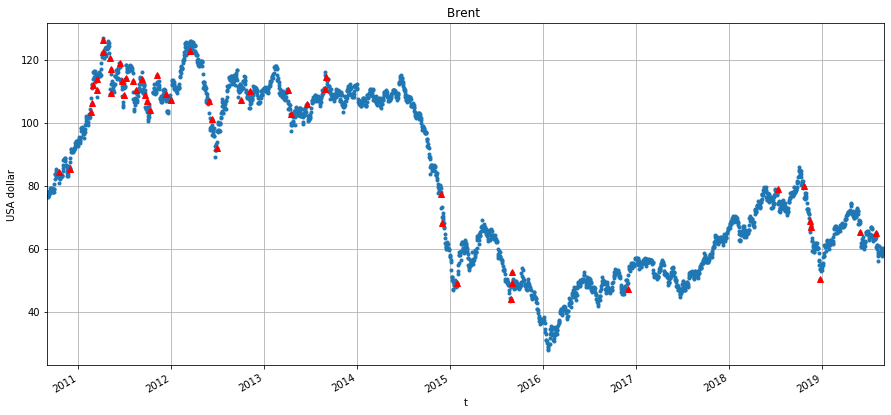

In [147]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.plot(brent_data.iloc[ind_anomal_brent].index,brent_data['Значение'].values[ind_anomal_brent],'^r', label='BRENT anomaly')
plt.ylabel('USA dollar')
plt.grid()
plt.xlabel('t')
plt.show()

**Добавьте первые разности по стоимости юаня, доллара и евро к рублю**

In [148]:
rub_D=pd.read_excel('D_F01_09_2010_T01_09_2019.xlsx')
rub_D.index = pd.to_datetime(rub_D['data'].values).date
rub_D.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_D.head()

,curs
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [149]:
rub_E=pd.read_excel('E_F01_09_2010_T01_09_2019(1).xlsx')
rub_E.index = pd.to_datetime(rub_E['data'].values).date
rub_E.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_E.head()

,curs
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


In [150]:
rub_U=pd.read_excel('U_F01_09_2010_T01_09_2019.xlsx')
rub_U.index = pd.to_datetime(rub_U['data'].values).date
rub_U.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_U.head()

,curs
2010-09-01,45.3325
2010-09-02,45.2165
2010-09-03,45.0421
2010-09-04,45.1170
2010-09-07,45.0438


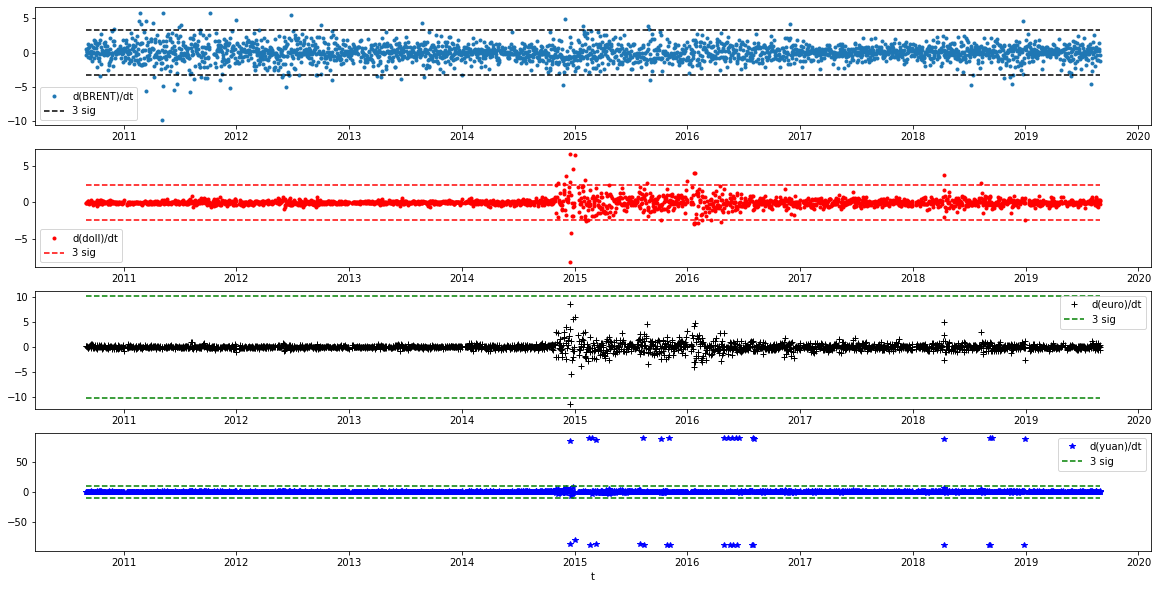

In [151]:
d_rub_doll = rub_D['curs'].values[1:]- rub_D['curs'].values[:-1]
s_rub = np.std(d_rub_doll)**0.5 *3

d_rub_e = rub_E['curs'].values[1:]- rub_E['curs'].values[:-1]
s_rube = np.std(d_rub_e)**0.5 *3

d_rub_u = rub_U['curs'].values[1:]- rub_U['curs'].values[:-1]
s_rube = np.std(d_rub_u)**0.5 *3

plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
plt.plot(brent_data.iloc[:-1].index,d_brent_data,'.', label='d(BRENT)/dt')
plt.plot(brent_data.iloc[[0,-1]].index,[s_brent, s_brent],'--k',label ='3 sig')
plt.plot(brent_data.iloc[[0,-1]].index,[-s_brent, -s_brent],'--k')
plt.legend()

plt.subplot(4,1,2)
plt.plot(rub_D.iloc[:-1].index,d_rub_doll,'.r', label='d(doll)/dt')
plt.plot(rub_D.iloc[[0,-1]].index,[s_rub, s_rub],'--r',label ='3 sig')
plt.plot(rub_D.iloc[[0,-1]].index,[-s_rub, -s_rub],'--r')
plt.legend()

plt.subplot(4,1,3)
plt.plot(rub_E.iloc[:-1].index,d_rub_e,'+k', label='d(euro)/dt')
plt.plot(rub_E.iloc[[0,-1]].index,[s_rube, s_rube],'--g',label ='3 sig')
plt.plot(rub_E.iloc[[0,-1]].index,[-s_rube, -s_rube],'--g')
plt.legend()


plt.subplot(4,1,4)
plt.plot(rub_U.iloc[:-1].index,d_rub_u,'*b', label='d(yuan)/dt')
plt.plot(rub_U.iloc[[0,-1]].index,[s_rube, s_rube],'--g',label ='3 sig')
plt.plot(rub_U.iloc[[0,-1]].index,[-s_rube, -s_rube],'--g')
plt.legend()


plt.xlabel('t')
plt.legend()
# plt.title('Цена нефти Brent, USA Dollar')
plt.show()

# ind_anomal_brent = np.where( abs(d_brent_data)>s_brent)[0]
# ind_anomal_rubl_d = np.where( abs(d_rub_doll)>s_rub)[0]
# ind_anomal_rubl_e = np.where( abs(d_rub_e)>s_rube)[0]
# ind_anomal_rubl_u = np.where( abs(d_rub_u)>s_rube)[0]
   


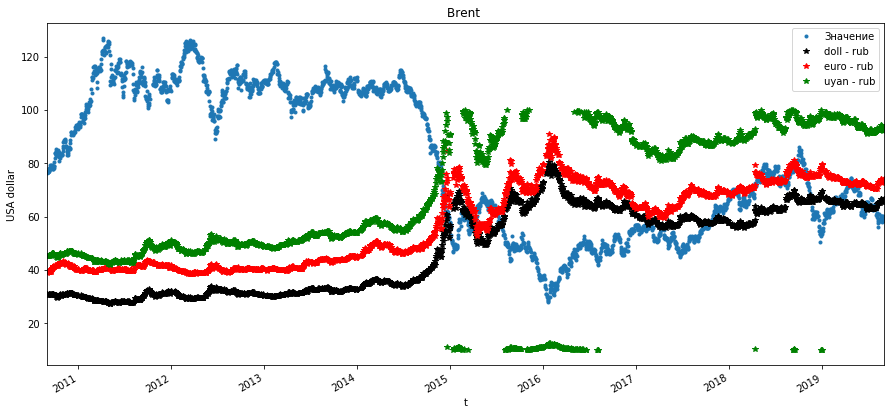

In [152]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.plot(rub_D.index,rub_D['curs'].values,'*k', label='doll - rub')
plt.plot(rub_E.index,rub_E['curs'].values,'*r', label='euro - rub')
plt.plot(rub_U.index,rub_U['curs'].values,'*g', label='uyan - rub')
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.legend()
plt.show()

In [178]:
# F_diff_data = pd.DataFrame.from_dict({'Brent':d_brent_data, 
#                                       'D': d_rub_doll, 
#                                       'E': d_rub_e, 
#                                       'U': d_rub_u}, orient='index')
# # Compare_data.index =brent_data['Значение'].index
# F_diff_data.pivot()
# a = {'Links' : lines ,'Titles' : titles , 'Singers': finalsingers , 'Albums':finalalbums , 'Years' : years}
# df = pd.DataFrame.from_dict(a, orient='index')
# df.transpose()
# d_brent_data
# len(d_brent_data), len(d_rub_doll), len(d_rub_e)
# d_brent_data = brent_data['Значение'].values[1:]- brent_data['Значение'].values[:-1]

# F_diff_data.head()

**Сделайте ее перерасчет (ресемплинг) в представление по неделям.** 

In [188]:
brent_data['brent_diff'] = 0
brent_data['brent_diff'] = brent_data['brent_diff'].astype('float')
brent_data['brent_diff'].values[1:] = d_brent_data

rub_D['usd_diff'] = 0
rub_D['usd_diff'] = rub_D['usd_diff'].astype('float')
rub_D['usd_diff'].values[1:] = d_rub_doll

rub_E['eur_diff'] = 0
rub_E['eur_diff'] = rub_E['eur_diff'].astype('float')
rub_E['eur_diff'].values[1:] = d_rub_e

rub_U['uyan_diff'] = 0
rub_U['uyan_diff'] = rub_U['uyan_diff'].astype('float')
rub_U['uyan_diff'].values[1:] = d_rub_u

brent_data = brent_data.rename(columns = {'Значение':'Brent'})

new_df = pd.merge(brent_data, rub_D, how='inner', left_index=True, right_index=True)
new_df = pd.merge(new_df, rub_E, how='inner', left_index=True, right_index=True)
new_df = pd.merge(new_df, rub_U, how='inner', left_index=True, right_index=True)



new_df.drop(['curs_x','curs_y','curs','dayofmonth', 'dayofyear', 'dayofweek',  
             'is_prev_holiday', 'is_next_holiday', 'year','month','quarter','weekofyear','is_holiday'], axis=1,inplace = True)



brent_weekly = new_df.resample("W").mean()

# brent_weekly = pdbrent_weekly['brent_diff','usd_diff','eur_diff','uyan_diff']

brent_weekly.head()

,Brent,brent_diff,usd_diff,eur_diff,uyan_diff
2010-09-05,76.6125,0.0625,-0.043675,0.084450,-0.053875
2010-09-12,77.8340,0.2980,0.040300,-0.031760,0.105400
2010-09-19,78.6850,-0.3050,0.032150,0.281225,0.111850
2010-09-26,78.2025,-0.1400,-0.019875,0.181625,0.008100
2010-10-03,81.3600,1.4175,-0.108850,0.044825,-0.138900


In [189]:
brent_weekly.dropna(inplace=True)

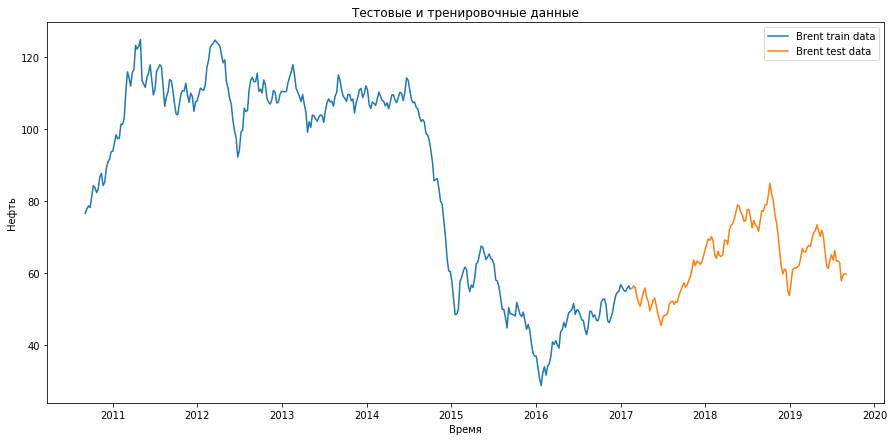

In [190]:
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()


train, test = split_data( brent_weekly[-2000:], -131)

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(train.index,train.iloc[:,0], label='Brent train data' )
plt.plot(test.index,test.iloc[:,0], label='Brent test data')

plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

**Постройте модель предсказания 1-й точки от текущей (h=1).**

In [191]:
h = 1

X_train = train.iloc[:-h,:]
y_train = train['Brent'].values[h:]
X_test = test.iloc[:-h,:]
y_test = test['Brent'].values[h:]

In [192]:
from catboost import CatBoostRegressor, Pool

from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_regression, mutual_info_regression

In [210]:
model_cat = CatBoostRegressor()

# model_cat = CatBoostRegressor(iterations=2, 
#                           depth=10, 
#                           learning_rate=0.03, 
#                           loss_function='RMSE')
# # model = CatBoostRegressor(iterations=2, 
# #                           depth=2, 
# #                           learning_rate=1, 
# #                           loss_function='RMSE')

In [211]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

def get_random_search(X_train, y_train):
    param_dist = {"depth": [1,2,3,4,5,6,7,8], 
                "iterations":[1,2,3,4,5,6],
                 "learning_rate":[2.0,1.0,0.05, 0.1,0.005]}

    #  randomized search
    n_iter_search = 10

    model_cat = CatBoostRegressor()

    random_search = RandomizedSearchCV(model_cat, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

    random_search.fit(X_train, y_train)

    report(random_search.cv_results_)
    return random_search

random_search = get_random_search(X_train, y_train)

In [202]:
# # # paramgrid = {"kernel": ["rbf"],
# # #              "C"     : np.logspace(-9, 9, num=25, base=10),
# # #              "gamma" : np.logspace(-9, 9, num=25, base=10)}
# paramgrid = {"depth": [1,2,3,4,5,6,7,8], 
#                 "iterations":[1,2,3,4,5,6],
#                  "learning_rate":[1.0,0.05, 0.1,0.005]}
# # # print("Size: ", len(paramgrid["kernel"])*len(paramgrid["C"])*len(paramgrid["gamma"]))

# cv = GridSearchCV(estimator=model_cat,
#                   param_grid=paramgrid,
#                   scoring="accuracy",
#                   cv=StratifiedKFold(n_splits=5),
#                   verbose=1)
# %time cv.fit(X_train, y_train)

# cv.best_score_, cv.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [212]:
# model_cat=CatBoostRegressor(learning_rate = 1.0, iterations=4, depth=3)

model_cat.fit( X_train, y_train )

Learning rate set to 0.032023
0:	learn: 27.6167653	total: 11.2ms	remaining: 11.2s
1:	learn: 26.9361627	total: 23.7ms	remaining: 11.8s
2:	learn: 26.2473416	total: 34.3ms	remaining: 11.4s
3:	learn: 25.6036726	total: 44.6ms	remaining: 11.1s
4:	learn: 24.9409679	total: 56ms	remaining: 11.1s
5:	learn: 24.3248100	total: 61ms	remaining: 10.1s
6:	learn: 23.6763211	total: 67.8ms	remaining: 9.63s
7:	learn: 23.0874013	total: 77.7ms	remaining: 9.64s
8:	learn: 22.4930422	total: 82.9ms	remaining: 9.12s
9:	learn: 21.9179522	total: 87.9ms	remaining: 8.71s
10:	learn: 21.3807140	total: 92.7ms	remaining: 8.34s
11:	learn: 20.8321577	total: 97.9ms	remaining: 8.06s
12:	learn: 20.2939586	total: 103ms	remaining: 7.81s
13:	learn: 19.8363518	total: 108ms	remaining: 7.63s
14:	learn: 19.3125237	total: 114ms	remaining: 7.46s
15:	learn: 18.8897253	total: 122ms	remaining: 7.47s
16:	learn: 18.4173956	total: 127ms	remaining: 7.33s
17:	learn: 17.9068774	total: 132ms	remaining: 7.2s
18:	learn: 17.4689047	total: 137ms	re

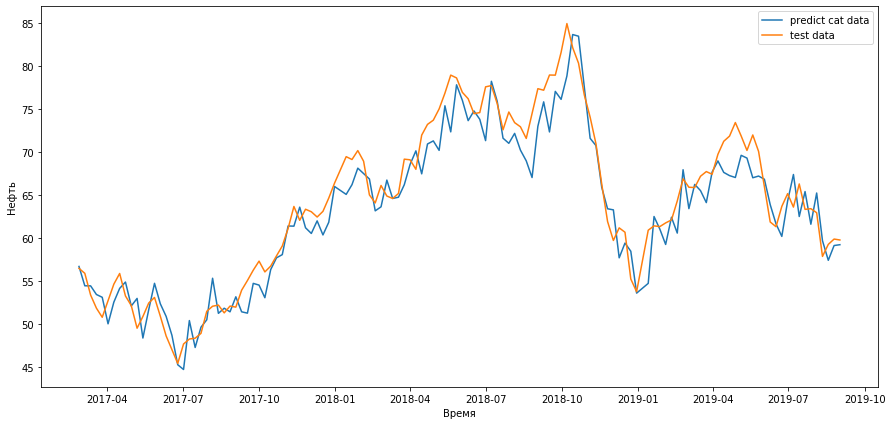

In [213]:

y_test_pred_c = model_cat.predict(X_test)

plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(test.index[h:],y_test_pred_c, label='predict cat data' )
plt.plot(test.index[h:],y_test, label='test data')

plt.legend()
plt.show()

In [214]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_c) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_c) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_c)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

er_g = mean_absolute_percentage_error(y_test, y_test_pred_c)

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')



ошибка mse :   7.0790797280327755 
ошибка mae  :   2.113518520403171 
оценка R2 :   0.9178015959921116
ошибка градиентного бустинга MAPE :   3.255218394129568 %


**Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.**

R2 получился приличный.
Я думаю из-за того что еще юань добавил, он меньше привязан к нефти чем евро/доллар.

## ЗАГОТОВКИ

In [252]:
brent_data_a = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])

In [257]:
# The 'MS' string groups the data in buckets by start of the month
y = brent_data_a['Значение'].resample('D').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

y.tail()

Дата
2019-08-28    59.84
2019-08-29    60.37
2019-08-30    59.19
2019-08-31    58.84
2019-09-01    58.84
Freq: D, Name: Значение, dtype: float64

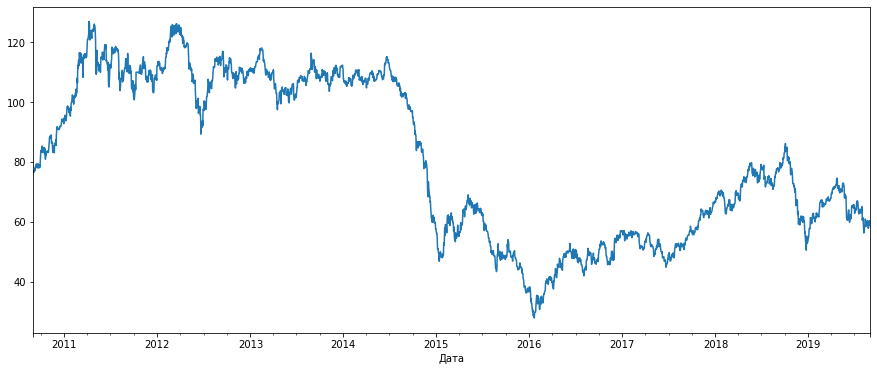

In [256]:
y.plot(figsize=(15, 6))
plt.show()

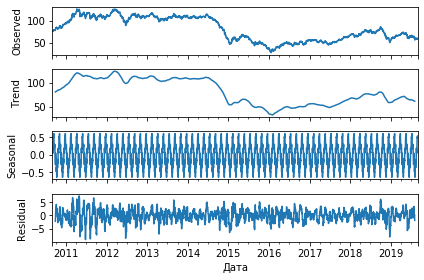

In [258]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

# Perform additive decomposition
decomp = seasonal_decompose(y, 
                            freq=52)

# Plot decomposition
decomp.plot()
plt.show()

In [260]:
import itertools

In [261]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [264]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
#             best_params = df_aic.loc[df_aic['AIC'] == df_aic['AIC'].min()]

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:38541.82383322684
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:34074.957199394805
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:17916.72035489676
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:17859.266072037415
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:17919.460344468756
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:17912.18673856322
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:17863.4372678293
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:17839.236210067545
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:34050.03926729788
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:29666.044049209668
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:15130.13489716918
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:15064.804111411804
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:15136.335815878838
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:15163.249489561236
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:15071.918530553732
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:15065.808335493635
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:10032.596858219924
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:10007.024597334008

In [267]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0563      0.013     -4.273      0.000      -0.082      -0.030
ma.S.L12      -0.9948      0.007   -145.957      0.000      -1.008      -0.981
sigma2         1.2447      0.018     69.545      0.000       1.210       1.280


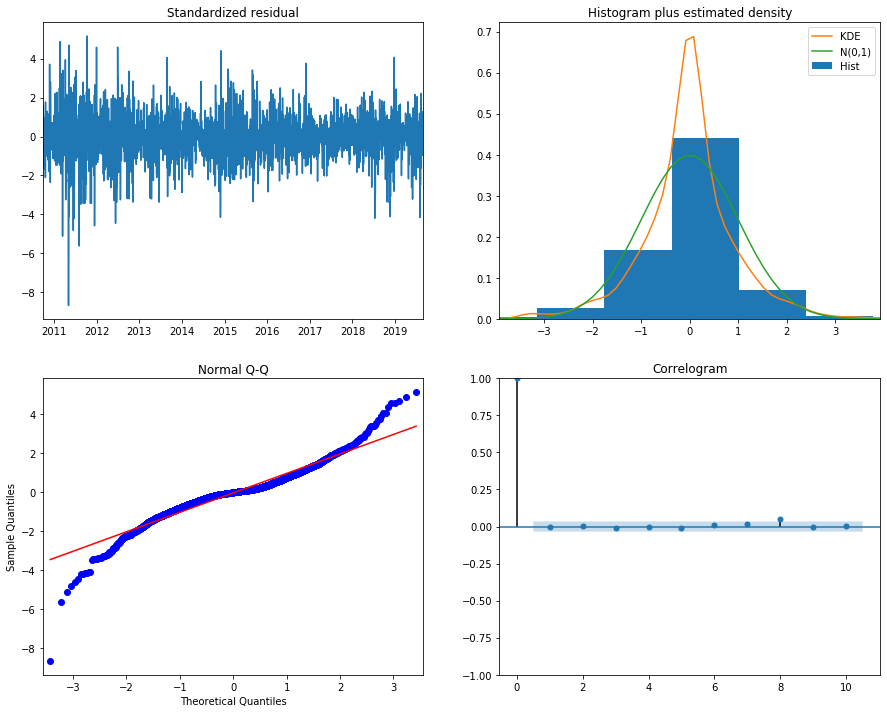

In [268]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# >>> from scipy.special import boxcox, inv_boxcox
# >>> y = boxcox([1, 4, 10], 2.5)
# >>> inv_boxcox(y, 2.5)
# array([1., 4., 10.])



# def box_cox(df, lmbda=None, alpha=None):
#     """
#     Performs a Box-Cox Transformation on all columns (features) of a pandas
#     dataframe. Currently, there is some ambiguity as to how to deal with
#     non-positive values & I need to check this out: at the moment, I just centre
#     the data so that min(value) > 0, for all features, as necessitated by
#     the very nature of the Box-Cox Transformation.
#     """
#     df_tr = pd.DataFrame(columns=df.columns)  # initialize empty data frame with same features as df
#     for val in list(df.columns):
#         df_tr[val] = stats.boxcox(df[val] - min(df[val]) + 0.1, lmbda, alpha)[
#             0
#         ]  # populate dataframe with transformed data
#     return df_tr

In [269]:
pred = results.get_prediction(start=pd.to_datetime('2016-08-28'), dynamic=False)
pred_ci = pred.conf_int()

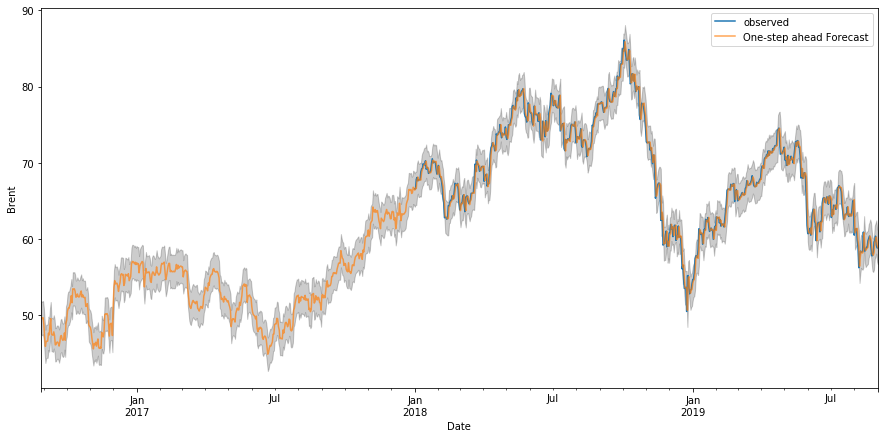

In [272]:
plt.figure( figsize=( 15, 7 ))
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Brent')
plt.legend()

plt.show()

In [274]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-08-28':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.81


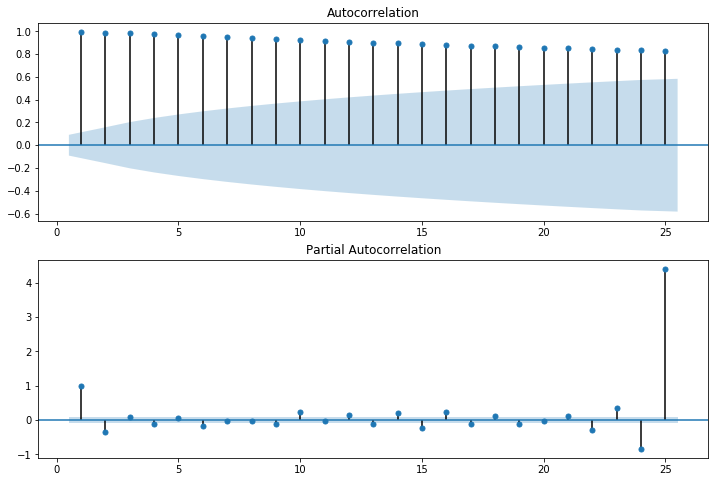

In [221]:
# Create figure and subplot

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot the ACF on ax1
plot_acf(brent_weekly['Brent'], lags=25, zero=False,  ax=ax1)
plot_pacf(brent_weekly['Brent'], lags=25, zero=False,  ax=ax2)
# Show figure
plt.show()

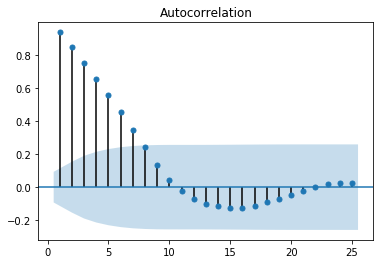

In [225]:
# Subtract the rolling mean
brent_2 = brent_weekly['Brent']- brent_weekly['Brent'].rolling(15).mean()

# Drop the NaN values
brent_2 = brent_2.dropna()
brent_2.head()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(brent_2, lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

In [234]:
model = sm.tsa.statespace.SARIMAX(brent_2, order=(1,1,0), seasonal_order=(0,1,1,52))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Brent   No. Observations:                  447
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 52)   Log Likelihood                -946.298
Date:                            Thu, 23 Apr 2020   AIC                           1898.596
Time:                                    00:15:55   BIC                           1910.525
Sample:                                         0   HQIC                          1903.323
                                            - 447                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2097      0.054      3.902      0.000       0.104       0.315
ma.S.L52      -0.9007      0.155   

In [241]:
#  python -m pip3 install pmdarima

import pmdarima as pm

In [242]:
# Create model for SARIMAX(p,1,q)(P,1,Q)12
model3 = pm.auto_arima(brent_2,
                      seasonal=True, m=12,
                      d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model3.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=2012.114, BIC=2036.552, Time=7.287 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=2335.840, BIC=2343.986, Time=0.108 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=2139.321, BIC=2155.613, Time=1.718 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=2010.245, BIC=2026.537, Time=5.406 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=2333.843, BIC=2337.916, Time=0.065 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=2012.115, BIC=2032.480, Time=8.629 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 1, 1)x(1, 1, 0, 12) (constant

In [249]:
brent_weekly.plot_diagnostics()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'plot_diagnostics'

In [250]:
brent_weekly.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461 entries, 2010-09-05 to 2019-09-01
Data columns (total 5 columns):
Brent         461 non-null float64
brent_diff    461 non-null float64
usd_diff      461 non-null float64
eur_diff      461 non-null float64
uyan_diff     461 non-null float64
dtypes: float64(5)
memory usage: 21.6 KB


In [ ]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()